# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import plot_model


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

2024-03-23 09:20:21.141222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 09:20:21.141347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 09:20:21.272378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle61_c.jpg
/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle91_c.jpg
/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle140_c.jpg
/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle133_c.jpg
/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle137.jpg
/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle56.jpg
/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle28.jpg
/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle69.jpg
/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle52.jpg
/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Hol

In [2]:
!nvidia-smi

Sat Mar 23 09:20:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Visualizing the Breeds of the Cattles

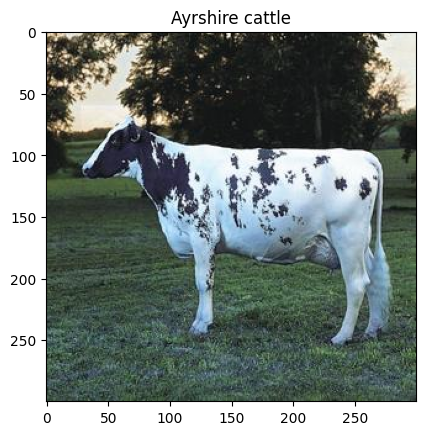

In [3]:
img = cv2.imread('/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Ayrshire cattle/Ayrshirecattle0.jpg')
plt.title('Ayrshire cattle')
plt.imshow(img)

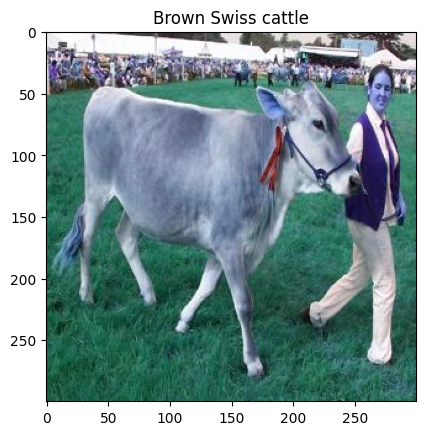

In [4]:
img = cv2.imread('/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Brown Swiss cattle/BrownSwisscattle1.jpg')
plt.title('Brown Swiss cattle')
plt.imshow(img)

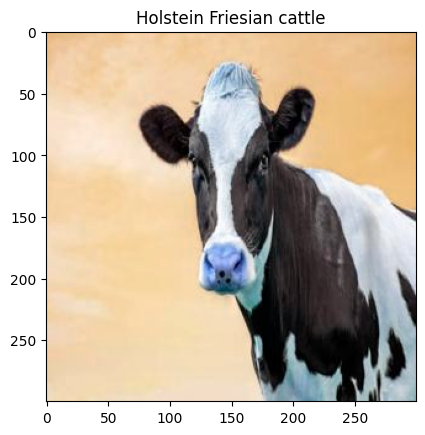

In [5]:
img = cv2.imread('/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Holstein Friesian cattle/HolsteinFriesiancattle10.jpg')
plt.title('Holstein Friesian cattle')
plt.imshow(img)

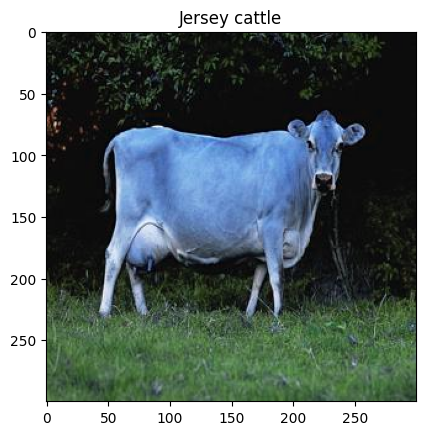

In [6]:
img = cv2.imread('/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Jersey cattle/Jerseycattle0_c.jpg')
plt.title('Jersey cattle')
plt.imshow(img)

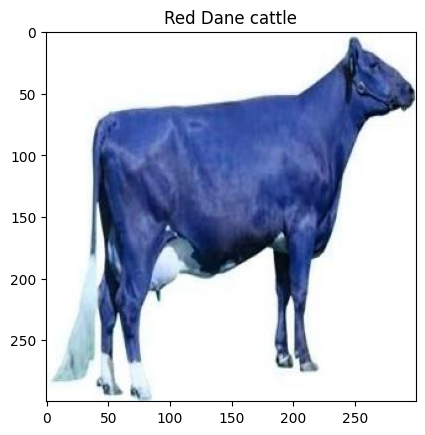

In [7]:
img = cv2.imread('/kaggle/input/cattle-breeds-dataset/Cattle Breeds/Red Dane cattle/RedDanecattle0_c.jpg')
plt.title('Red Dane cattle')
plt.imshow(img)

# Importing the Data

In [8]:
dirr = '/kaggle/input/cattle-breeds-dataset/Cattle Breeds'
img_width = 200
img_height = 200

In [9]:
categories = ['Ayrshire cattle', 'Brown Swiss cattle', 'Holstein Friesian cattle', 'Jersey cattle', 'Red Dane cattle']

img_data = []
for cata in categories:
    folder = os.path.join(dirr, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [10]:
random.shuffle(img_data)

In [11]:
x_t = []
y_t = []
for features,labels in img_data:
    x_t.append(features)
    y_t.append(labels)
    
x = np.array(x_t, dtype = 'float32')
y = np.array(y_t)

In [12]:
x.shape

(1208, 200, 200, 3)

# Normalizing the Data

In [13]:
x[7]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [14]:
for im in range(len(x)):
    x[im] /= 255.0

In [15]:
x[7]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

# Train, Validation & Test Splitting the Data

In [16]:
x_train, x_s, y_train, y_s = train_test_split(x, y, train_size = 0.6)

In [17]:
x_test, x_val, y_test, y_val = train_test_split(x_s, y_s, test_size = 0.5)

# Modeling the CNN

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(128, (3,3), padding = 'same', input_shape = (200, 200, 3), activation = 'tanh'))
model.add(AveragePooling2D(2,2))
model.add(Conv2D(128, (3,3), padding = 'same', activation = 'tanh'))
model.add(AveragePooling2D(2,2))
model.add(Flatten())
model.add(Dense(1500, activation = 'tanh'))
model.add(Dropout(0.4))
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 100, 100, 128)  │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 50, 50, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │   480,001,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     1,501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,658,673 (1.79 GB)

 Trainable params: 481,658,673 (1.79 GB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])

In [22]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 100)

Epoch 1/100


I0000 00:00:1711185666.284467      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711185666.300066      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.1886 - loss: 1.6760

W0000 00:00:1711185682.763323      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711185683.802984      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 969ms/step - accuracy: 0.1887 - loss: 1.6754 - val_accuracy: 0.2727 - val_loss: 1.5580
Epoch 2/100


W0000 00:00:1711185687.807967      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.2897 - loss: 1.5560 - val_accuracy: 0.1777 - val_loss: 1.6091
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.3111 - loss: 1.5026 - val_accuracy: 0.3058 - val_loss: 1.4781
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.3550 - loss: 1.4913 - val_accuracy: 0.2810 - val_loss: 1.4900
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.3985 - loss: 1.4479 - val_accuracy: 0.3678 - val_loss: 1.4414
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.4120 - loss: 1.3834 - val_accuracy: 0.3967 - val_loss: 1.3869
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.4634 - loss: 1.3291 - val_accuracy: 0.4091 - val_loss: 1.3893
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.4804 - loss: 1.3390 - val_accuracy: 0.4091 - val_loss: 1.3725
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.4845 - loss: 1.3025 - val_accuracy: 0.3884

In [23]:
model.evaluate(x_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5102 - loss: 1.6909


[1.9142030477523804, 0.4834710657596588]

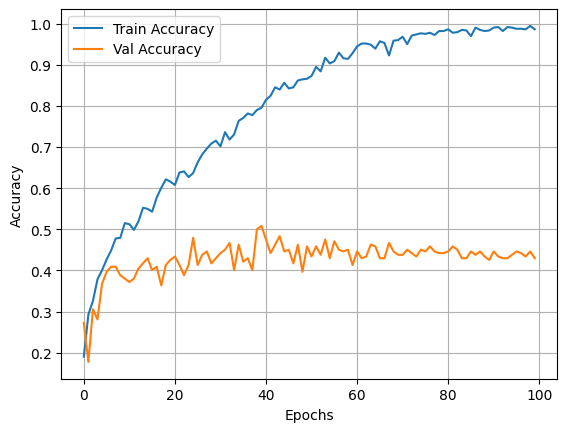

In [24]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.grid()
plt.legend(loc = 'best')